In [1]:
import numpy as np
import pandas as pd
from skbio import OrdinationResults
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import files
beta_file = '../results/soil_differentials.csv'
beta = pd.read_csv(beta_file)
taxa = pd.read_csv('../data/soils/taxonomy.tsv', sep="\t")

#fix headers
beta.rename(columns={"Unnamed: 0" : "sampleid"}, inplace=True)

#merge!
betataxa = pd.merge(taxa, beta, left_on="sampleid", right_on="sampleid")

First save biplot to a file

In [3]:
beta = betataxa.set_index('sampleid')

In [4]:
taxa = pd.DataFrame(list(beta.Taxon.apply(lambda x: x.split('; ')).values))
taxa.columns = ['kingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species']

In [5]:
taxa.index = beta.index
beta = pd.concat((taxa, beta), axis=1)

In [6]:
colnames = ['microbial_biomass', 'ph', 'tot_nitro', 'tot_org_carb', 'water_content_soil']
data = beta[colnames]

In [10]:
taxa.to_csv('taxa.txt', sep='\t')

Now, let's investigate the biplot

In [11]:
beta[['Taxon', 'ph']].sort_values('ph').head()

,Taxon,ph
sampleid,,
TACAGAGGGTGCAAGCGTTAATCGGAGTTACTGGGCGTAAAGGGCGCGTAGGCGGTTTAATGGGTGTGATGTGAAAGCCTTGGGCTTAACCTGAGAAGTGCATCGCAAACTAGTAAACTGGAGTAGATGAGAGGGTGGCGGAATTTCCGG,k__Bacteria; p__Proteobacteria; c__Gammaproteo...,-3.026261
TACAGAGGGTGCGAGCGTTGTTCGGAATTATTGGGCGTAAAGGGCGCGTAGGCGGCGCCACAAGTCACCTGTGAAAACTCTGGGCTCAACTCAGAGCCTGCAGGCGAAACTGTGGTGCTGGAGTATGGGAGAGGTGCGTGGAATTCCCGG,k__Bacteria; p__Acidobacteria; c__Acidobacteri...,-3.024533
GACGTAGGGGGCAAGCGTTGTCCGGAATTATTGGGCGTAAAGCGCTCGTAGGTGGATTTGCAAGTCTGCAAGGAAAGACCCGGGCTCAACTCGGGAACCCGTGTGGATACTGCAAACCTTGAGGTAGTCAGAGGATGATGGAATTCCCGG,k__Bacteria; p__WPS-2; c__; o__; f__; g__; s__,-2.739818
TACAGAGGTCCCAAGCGTTGTTCGGATTCACTGGGCGTAAAGGGTGCGTAGGCGGTTTGACAAGTCTGATGTGAAATCCCGCAGCTTAACTGCGGAACTGCATTGGAAACTGTCTGACTAGAGGAATGGAGGGGAGACTGGAATGCTTGG,k__Bacteria; p__Verrucomicrobia; c__[Pedosphae...,-2.730507
TACAGAGGGTGCAAGCGTTGTTCGGAATTATTGGGCGTAAAGGGTGCGTAGGCGGTGCGGTAAGTCTGTTGTGAAATCTCCAAGCTCAACTTGGAGCCTGCAACGGAAACTGCCGTGCTCGAGTATGGGAGAGGTGAGTGGAATTCCCGG,k__Bacteria; p__Acidobacteria; c__Acidobacteri...,-2.685880


>1 k__Bacteria; p__Proteobacteria; c__Gammaproteo...	-3.026261
TACAGAGGGTGCAAGCGTTAATCGGAGTTACTGGGCGTAAAGGGCGCGTAGGCGGTTTAATGGGTGTGATGTGAAAGCCTTGGGCTTAACCTGAGAAGTGCATCGCAAACTAGTAAACTGGAGTAGATGAGAGGGTGGCGGAATTTCCGG

Grows in activated charcoal.  Slightly acidic
https://www.ncbi.nlm.nih.gov/pubmed/14602611

>2 k__Bacteria; p__Acidobacteria; c__Acidobacteri...	-3.024533
TACAGAGGGTGCGAGCGTTGTTCGGAATTATTGGGCGTAAAGGGCGCGTAGGCGGCGCCACAAGTCACCTGTGAAAACTCTGGGCTCAACTCAGAGCCTGCAGGCGAAACTGTGGTGCTGGAGTATGGGAGAGGTGCGTGGAATTCCCGG

Not much

>3 k__Bacteria; p__WPS-2; c__; o__; f__; g__; s__	-2.739818
GACGTAGGGGGCAAGCGTTGTCCGGAATTATTGGGCGTAAAGCGCTCGTAGGTGGATTTGCAAGTCTGCAAGGAAAGACCCGGGCTCAACTCGGGAACCCGTGTGGATACTGCAAACCTTGAGGTAGTCAGAGGATGATGGAATTCCCGG

Not much

>4 k__Bacteria; p__Verrucomicrobia; c__Pedosphae...	-2.730507
TACAGAGGTCCCAAGCGTTGTTCGGATTCACTGGGCGTAAAGGGTGCGTAGGCGGTTTGACAAGTCTGATGTGAAATCCCGCAGCTTAACTGCGGAACTGCATTGGAAACTGTCTGACTAGAGGAATGGAGGGGAGACTGGAATGCTTGG

Not much

>5 k__Bacteria; p__Acidobacteria; c__Acidobacteri...	-2.685880
TACAGAGGGTGCAAGCGTTGTTCGGAATTATTGGGCGTAAAGGGTGCGTAGGCGGTGCGGTAAGTCTGTTGTGAAATCTCCAAGCTCAACTTGGAGCCTGCAACGGAAACTGCCGTGCTCGAGTATGGGAGAGGTGAGTGGAATTCCCGG

Grows between 3-6 : acidophile
https://www.ncbi.nlm.nih.gov/pubmed/19201974

In [12]:
beta[['Taxon', 'ph']].sort_values('ph').tail()

,Taxon,ph
sampleid,,
TACGGGGGGAGCAAGCGTTGTTCGGATTTACTGGGCGTAAAGGGCGCGTAGGCGGCCTCCGCAAGTCAGTTGTGAAATCTCCGAGCTTAACTCGGAAAGGTCAACTGATACTGCGGGGCTAGAGTGCGGAAGGGGCAACTGGAATTCTTG,k__Bacteria; p__Acidobacteria; c__[Chloracidob...,2.506298
CACGTAGGAGGCGAGCGTTGTCCGGAATCATTGGGCGTAAAGAGCGCGCAGGCGGCTTGGCAAGTCGGGTGTGAAATCCCGGGGCTCAACCCCGTGACTGCATTCGATACTGTCAGGCTAGAGGTAGGTAGGGGAGATCGGAATTCCTGG,k__Bacteria; p__Actinobacteria; c__MB-A2-108; ...,2.537946
TACCAGCACCCCGAGTGGTCGGGACGTTTATTGGGCCTAAAGCATCCGTAGCCGGCCTTACAAGTCCCCCGTTAAATCCAACTGCTTAACAGATGGGCTGCGGAGGATACTATAAGACTAGGAGGCAGGAGAGGCAAGCGGTACTCAGTG,k__Archaea; p__Crenarchaeota; c__Thaumarchaeot...,2.541804
TACGGAGGGTGCAAGCGTTATCCGGATTCACTGGGTTTAAAGGGTGCGTAGGTGGGCAAGTAAGTCAGTGGTGAAATCTCCGGGCTTAACCCGGAAACTGCCATTGATACTATTTGTCTTGAATACTGTGGAGGTCAGCGGAATATGTCA,k__Bacteria; p__Bacteroidetes; c__[Saprospirae...,2.634849
TACAGAGGGTGCTAGCGTTGTTCGGAATCATTGGGCGTAAAGGGCGTGTAGGCGGTTTGCTAAGTCATGTGTGAAATCCCTCGGCTCAACCGGGGAACGACGCATGAAACTGGCAAGCTAGAGTACCAAAGAGGGGGGTGGAATTCCCGG,k__Bacteria; p__Proteobacteria; c__Deltaproteo...,2.981031


>1  k__Bacteria; p__Acidobacteria; c__Chloracidob...	2.506298
TACGGGGGGAGCAAGCGTTGTTCGGATTTACTGGGCGTAAAGGGCGCGTAGGCGGCCTCCGCAAGTCAGTTGTGAAATCTCCGAGCTTAACTCGGAAAGGTCAACTGATACTGCGGGGCTAGAGTGCGGAAGGGGCAACTGGAATTCTTG

Not much

>2 k__Bacteria; p__Actinobacteria; c__MB-A2-108; ...	2.537946
CACGTAGGAGGCGAGCGTTGTCCGGAATCATTGGGCGTAAAGAGCGCGCAGGCGGCTTGGCAAGTCGGGTGTGAAATCCCGGGGCTCAACCCCGTGACTGCATTCGATACTGTCAGGCTAGAGGTAGGTAGGGGAGATCGGAATTCCTGG

Not much

>3 k__Archaea; p__Crenarchaeota; c__Thaumarchaeot...	2.541804
TACCAGCACCCCGAGTGGTCGGGACGTTTATTGGGCCTAAAGCATCCGTAGCCGGCCTTACAAGTCCCCCGTTAAATCCAACTGCTTAACAGATGGGCTGCGGAGGATACTATAAGACTAGGAGGCAGGAGAGGCAAGCGGTACTCAGTG

Ammonia oxidizer
https://www.ncbi.nlm.nih.gov/nucleotide/MK393915.1?report=genbank&log$=nucltop&blast_rank=1&RID=64CW6BUW01R

>4 k__Bacteria; p__Bacteroidetes; c__Saprospirae...	2.634849
TACGGAGGGTGCAAGCGTTATCCGGATTCACTGGGTTTAAAGGGTGCGTAGGTGGGCAAGTAAGTCAGTGGTGAAATCTCCGGGCTTAACCCGGAAACTGCCATTGATACTATTTGTCTTGAATACTGTGGAGGTCAGCGGAATATGTCA
                                      
Not much 
https://www.ncbi.nlm.nih.gov/pubmed/23748858                                      
                                      
>5 k__Bacteria; p__Proteobacteria; c__Deltaproteo...	2.981031
TACAGAGGGTGCTAGCGTTGTTCGGAATCATTGGGCGTAAAGGGCGTGTAGGCGGTTTGCTAAGTCATGTGTGAAATCCCTCGGCTCAACCGGGGAACGACGCATGAAACTGGCAAGCTAGAGTACCAAAGAGGGGGGTGGAATTCCCGG

Not much 

In [13]:
beta[['Taxon', 'tot_nitro']].sort_values('tot_nitro').head()

,Taxon,tot_nitro
sampleid,,
TACGGGGGGAGCAAGCGTTGTTCGGATTTACTGGGCGTAAAGGGCGCGTAGGCGGTCAGCACAAGTCAGTTGTGAAATCTCCGGGCTTAACTCGGAAAGGTCAACTGATACTGTGCGACTAGAGTGCGGAAGGGGCAACTGGAATTCTCG,k__Bacteria; p__Acidobacteria; c__[Chloracidob...,-4.124126
TACGGAGGGTGCAAGCGTTATCCGGATTCACTGGGTTTAAAGGGTGCGTAGGAGGGCAGGTAAGTCAGTGGTGAAATCTCCGAGCTTAACTTGGAAACTGCCGTTGATACTATCTGTCTTGAATATTGTGGAGGTGAGCGGAATATGTCA,k__Bacteria; p__Bacteroidetes; c__[Saprospirae...,-2.694195
TACGTAGGGACCAAGCGTTGTTCGGATTTACTGGGCGTAAAGGGCGCGTAGGCGGCGTGGTAAGTCACTTGTGAAATCTCTGAGCTTAACTCAGAACGGCCAAGTGATACTGCTGTGCTAGAGTGCAGAAGGGGCAATCGGAATTCTTGG,k__Bacteria; p__Acidobacteria; c__[Chloracidob...,-2.688204
TACGTAGGGACCAAGCGTTGTTCGGATTTACTGGGCGTAAAGGGCGCGTAGGCGGCAATTCAAGTCATCTGTGAAATCTCCGGGCTTAACTCGGAACGGTCAGATGATACTGCTTTGCTAGAGTGCAGAAGGGGCAATCGGAATTCTTGG,k__Bacteria; p__Acidobacteria; c__[Chloracidob...,-2.642457
TACGGAGGGTGCAAGCGTTATCCGGATTCACTGGGTTTAAAGGGTGCGTAGGCGGGCAGTTAAGTCCGTGGTGAAATCTCTGAGCTTAACTCAGAAACTGCCATGGATACTATCTGTCTTGAATGTTGTGGAGGTAAGCGGAATATGTCA,k__Bacteria; p__Bacteroidetes; c__[Saprospirae...,-2.629011


>1 k__Bacteria; p__Acidobacteria; c__Chloracidob...	-4.124126
TACGGGGGGAGCAAGCGTTGTTCGGATTTACTGGGCGTAAAGGGCGCGTAGGCGGTCAGCACAAGTCAGTTGTGAAATCTCCGGGCTTAACTCGGAAAGGTCAACTGATACTGTGCGACTAGAGTGCGGAAGGGGCAACTGGAATTCTCG

Not much

>2 k__Bacteria; p__Bacteroidetes; c__Saprospirae...	-2.694195
TACGGAGGGTGCAAGCGTTATCCGGATTCACTGGGTTTAAAGGGTGCGTAGGAGGGCAGGTAAGTCAGTGGTGAAATCTCCGAGCTTAACTTGGAAACTGCCGTTGATACTATCTGTCTTGAATATTGTGGAGGTGAGCGGAATATGTCA

Not much

>3 k__Bacteria; p__Acidobacteria; c__Chloracidob...	-2.688204
TACGTAGGGACCAAGCGTTGTTCGGATTTACTGGGCGTAAAGGGCGCGTAGGCGGCGTGGTAAGTCACTTGTGAAATCTCTGAGCTTAACTCAGAACGGCCAAGTGATACTGCTGTGCTAGAGTGCAGAAGGGGCAATCGGAATTCTTGG

Not much

>4 k__Bacteria; p__Acidobacteria; c__Chloracidob...	-2.642457
TACGTAGGGACCAAGCGTTGTTCGGATTTACTGGGCGTAAAGGGCGCGTAGGCGGCAATTCAAGTCATCTGTGAAATCTCCGGGCTTAACTCGGAACGGTCAGATGATACTGCTTTGCTAGAGTGCAGAAGGGGCAATCGGAATTCTTGG

Nitrate reducer
https://www.ncbi.nlm.nih.gov/pubmed/28945537

>5 k__Bacteria; p__Bacteroidetes; c__Saprospirae...	-2.629011
TACGGAGGGTGCAAGCGTTATCCGGATTCACTGGGTTTAAAGGGTGCGTAGGCGGGCAGTTAAGTCCGTGGTGAAATCTCTGAGCTTAACTCAGAAACTGCCATGGATACTATCTGTCTTGAATGTTGTGGAGGTAAGCGGAATATGTCA

Not much

In [14]:
beta[['Taxon', 'tot_nitro']].sort_values('tot_nitro').tail(10)

,Taxon,tot_nitro
sampleid,,
TACAGAGGTCCCAAGCGTTGTTCGGATTCACTGGGCGTAAAGGGTGCGTAGGTGGTGAGGTAAGTCGGATGTGAAAGCTCGGAGCTCAACTCCGAAATGGCATTGGAAACTACCTTGCTCGAGGGTTGGAGGGGGGACTGGAATACTTGG,k__Bacteria; p__Verrucomicrobia; c__[Pedosphae...,3.154443
GACGGAGGGTGCAAGCGTTGTTCGGATTGACTGGGCGTAAAGGGCGTGTAGGCGGTTCGTTAAGTCGGGTGTGAAAGCCCGGGGCTCAGCTCCGGAAGTGCGCCCGAAACTGGCGAGCTGGAGCGCGGTAGAGGAGGGTGGAATTCCTGG,k__Bacteria; p__Proteobacteria; c__Deltaproteo...,3.189011
TACGTAGGCAGCAAGCGTTGTTCGGAATTACTGGGCGTAAAGAGTGTGTAGGCGGTGTTCTAAGTTTGTCGTGAAATCTCCCGGCTTAACTGGGAGGGTGCGGCGAAAACTGGAATGCTAGAGGATGGGAGAGGTAAGCGGAATTCCTGG,k__Bacteria; p__Acidobacteria; c__Solibacteres...,3.230459
TACAGAGGGTGCGAGCGTTGTTCGGAATTATTGGGCGTAAAGGGCGCGTAGGCGGTGCCACAAGTCACTTGTGAAATCTCCGGGCTTAACTCGGAGCCTGCAGGCGAAACTGTGGTGCTGGAGTGTGGGAGAGGTGCGTGGAATTCCCGG,k__Bacteria; p__Acidobacteria; c__Acidobacteri...,3.349997
TACGTAGGGCGCGAGCGTTGTCCGGAATTATTGGGCGTAAAGAGCTCGTAGGCGGCCGGTTGCGTCTGCTGTGAAATCCCGGGGCTTAACCCCGGGCGTGCAGTGGATACGGGCCGGCTGGAGGCAGGCAGGGGAGAATGGAATTCCCGG,k__Bacteria; p__Actinobacteria; c__Actinobacte...,3.504497
TACAGAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGACGGTTTTGTAAGTCAGATGTGAAATCCCTGGGCTCAACCTGGGAACTGCATTTGAAACTGCATGGCTAGAGTATGGAAGAGGGAAGTGGAATTTCCGG,k__Bacteria; p__Proteobacteria; c__Gammaproteo...,3.816770
TACCAGCACCCCGAGTGGTCGGGACGATTATTGGGCCTAAAGCATCCGTAGCCGGCCTTACAAGTCCCCCGTTAAATCCAACTGCTTAACAGATGGGCTGCGGAGGATACTATAAGACTAGGAGGCAGGAGAGGCAAGCGGTACTCAGTG,k__Archaea; p__Crenarchaeota; c__Thaumarchaeot...,3.844171
TACAGAGGGTGCGAGCGTTGTTCGGAATTATTGGGCGTAAAGGGCGCGTAGGCGGCGCGGTATGTCACCTGTGAAATCTCCTGGCTCAACTGGGAGCTTGCAGGCGAAACTGCCGTGCTGGAGTGTGGGAGAGGTGCGTGGAATTCCCGG,k__Bacteria; p__Acidobacteria; c__Acidobacteri...,4.328348
TACGGAGGGTGCAAGCGTTATCCGGATTCACTGGGTTTAAAGGGTGCGTAGGCGGGTTGGTAAGTCCGTGGTGAAATCTCCAAGCTTAACTTGGAAACTGCCGTGGATACTATCAATCTTGAATATAGTGGAGGTGAGCGGAATATGTCA,k__Bacteria; p__Bacteroidetes; c__[Saprospirae...,4.392308


Sequence hits from blast

>1 k__Bacteria; p__Proteobacteria; c__Gammaproteo...	3.816770
TACAGAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGACGGTTTTGTAAGTCAGATGTGAAATCCCTGGGCTCAACCTGGGAACTGCATTTGAAACTGCATGGCTAGAGTATGGAAGAGGGAAGTGGAATTTCCGG

Well known nitrogen reducer: Steroidobacter denitrificans
https://www.ncbi.nlm.nih.gov/pubmed/18768632

>2 k__Archaea; p__Crenarchaeota; c__Thaumarchaeot...	3.844171
TACCAGCACCCCGAGTGGTCGGGACGATTATTGGGCCTAAAGCATCCGTAGCCGGCCTTACAAGTCCCCCGTTAAATCCAACTGCTTAACAGATGGGCTGCGGAGGATACTATAAGACTAGGAGGCAGGAGAGGCAAGCGGTACTCAGTG

Ammonia oxider
https://www.ncbi.nlm.nih.gov/pubmed/24907263

>3 k__Bacteria; p__Acidobacteria; c__Acidobacteri...	4.328348
TACAGAGGGTGCGAGCGTTGTTCGGAATTATTGGGCGTAAAGGGCGCGTAGGCGGCGCGGTATGTCACCTGTGAAATCTCCTGGCTCAACTGGGAGCTTGCAGGCGAAACTGCCGTGCTGGAGTGTGGGAGAGGTGCGTGGAATTCCCGG

Not much
https://www.ncbi.nlm.nih.gov/pubmed/21108723

>4 k__Bacteria; p__Bacteroidetes; c__Saprospirae...	4.392308 
TACGGAGGGTGCAAGCGTTATCCGGATTCACTGGGTTTAAAGGGTGCGTAGGCGGGTTGGTAAGTCCGTGGTGAAATCTCCAAGCTTAACTTGGAAACTGCCGTGGATACTATCAATCTTGAATATAGTGGAGGTGAGCGGAATATGTCA

Not much
https://www.ncbi.nlm.nih.gov/pubmed/20656815

>5 k__Bacteria; p__Acidobacteria; c__Acidobacteri...	4.627268
TACAGAGGGTGCGAGCGTTGTTCGGAATTATTGGGCGTAAAGGGCGCGTAGGCGGTGCGGTAAGTCACCTGTGAAATCTCCTGGCTCAACTGGGAGCTTGCAGGCGAAACTGCCGTGCTGGAGTGTGGGAGAGGTGCGTGGAATTCCCGG

Not much
https://www.ncbi.nlm.nih.gov/pubmed/21108723

>6 k__Bacteria; p__Verrucomicrobia; c__Pedosphae...	3.154443
TACAGAGGTCCCAAGCGTTGTTCGGATTCACTGGGCGTAAAGGGTGCGTAGGTGGTGAGGTAAGTCGGATGTGAAAGCTCGGAGCTCAACTCCGAAATGGCATTGGAAACTACCTTGCTCGAGGGTTGGAGGGGGGACTGGAATACTTGG

Most likely 
https://www.ncbi.nlm.nih.gov/pubmed/12147477
https://www.ncbi.nlm.nih.gov/pubmed/14660368

>7 k__Bacteria; p__Proteobacteria; c__Deltaproteo...	3.189011
GACGGAGGGTGCAAGCGTTGTTCGGATTGACTGGGCGTAAAGGGCGTGTAGGCGGTTCGTTAAGTCGGGTGTGAAAGCCCGGGGCTCAGCTCCGGAAGTGCGCCCGAAACTGGCGAGCTGGAGCGCGGTAGAGGAGGGTGGAATTCCTGG

Not much

>8 k__Bacteria; p__Acidobacteria; c__Solibacteres...	3.230459
TACGTAGGCAGCAAGCGTTGTTCGGAATTACTGGGCGTAAAGAGTGTGTAGGCGGTGTTCTAAGTTTGTCGTGAAATCTCCCGGCTTAACTGGGAGGGTGCGGCGAAAACTGGAATGCTAGAGGATGGGAGAGGTAAGCGGAATTCCTGG

Not much

>9 k__Bacteria; p__Acidobacteria; c__Acidobacteri...	3.349997
TACAGAGGGTGCGAGCGTTGTTCGGAATTATTGGGCGTAAAGGGCGCGTAGGCGGTGCCACAAGTCACTTGTGAAATCTCCGGGCTTAACTCGGAGCCTGCAGGCGAAACTGTGGTGCTGGAGTGTGGGAGAGGTGCGTGGAATTCCCGG

Not much
https://www.ncbi.nlm.nih.gov/pubmed/21108723

>10 k__Bacteria; p__Actinobacteria; c__Actinobacte...	3.504497
TACGTAGGGCGCGAGCGTTGTCCGGAATTATTGGGCGTAAAGAGCTCGTAGGCGGCCGGTTGCGTCTGCTGTGAAATCCCGGGGCTTAACCCCGGGCGTGCAGTGGATACGGGCCGGCTGGAGGCAGGCAGGGGAGAATGGAATTCCCGG

Probably
https://www.ncbi.nlm.nih.gov/pubmed/14660368

In [15]:
functional_role = pd.Series(
    {        
        #'TACGTAGGGACCAAGCGTTGTTCGGATTTACTGGGCGTAAAGGGCGCGTAGGCGGCAATTCAAGTCATCTGTGAAATCTCCGGGCTTAACTCGGAACGGTCAGATGATACTGCTTTGCTAGAGTGCAGAAGGGGCAATCGGAATTCTTGG': 'nitrogen_reducer',
        'TACAGAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGACGGTTTTGTAAGTCAGATGTGAAATCCCTGGGCTCAACCTGGGAACTGCATTTGAAACTGCATGGCTAGAGTATGGAAGAGGGAAGTGGAATTTCCGG': 'nitrogen_reducer',
        'TACCAGCACCCCGAGTGGTCGGGACGATTATTGGGCCTAAAGCATCCGTAGCCGGCCTTACAAGTCCCCCGTTAAATCCAACTGCTTAACAGATGGGCTGCGGAGGATACTATAAGACTAGGAGGCAGGAGAGGCAAGCGGTACTCAGTG': 'ammonia_oxidizer',
        'TACAGAGGGTGCAAGCGTTGTTCGGAATTATTGGGCGTAAAGGGTGCGTAGGCGGTGCGGTAAGTCTGTTGTGAAATCTCCAAGCTCAACTTGGAGCCTGCAACGGAAACTGCCGTGCTCGAGTATGGGAGAGGTGAGTGGAATTCCCGG': 'acidophile'
    }
)

In [16]:
functional_role

TACAGAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGACGGTTTTGTAAGTCAGATGTGAAATCCCTGGGCTCAACCTGGGAACTGCATTTGAAACTGCATGGCTAGAGTATGGAAGAGGGAAGTGGAATTTCCGG    nitrogen_reducer
TACCAGCACCCCGAGTGGTCGGGACGATTATTGGGCCTAAAGCATCCGTAGCCGGCCTTACAAGTCCCCCGTTAAATCCAACTGCTTAACAGATGGGCTGCGGAGGATACTATAAGACTAGGAGGCAGGAGAGGCAAGCGGTACTCAGTG    ammonia_oxidizer
TACAGAGGGTGCAAGCGTTGTTCGGAATTATTGGGCGTAAAGGGTGCGTAGGCGGTGCGGTAAGTCTGTTGTGAAATCTCCAAGCTCAACTTGGAGCCTGCAACGGAAACTGCCGTGCTCGAGTATGGGAGAGGTGAGTGGAATTCCCGG          acidophile
dtype: object

Rank plots for nitrogen and ph

In [22]:
nitro_beta = beta['tot_nitro'].sort_values()
ph_beta = beta['ph'].sort_values()

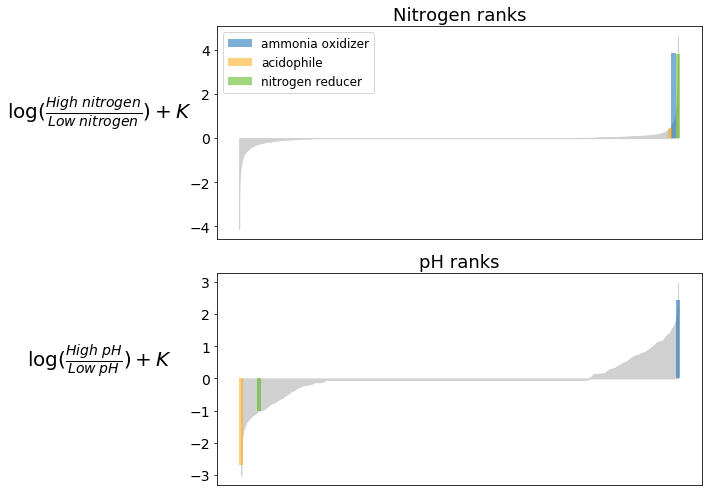

In [30]:
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
x = np.arange(len(nitro_beta))
y1 = np.array(nitro_beta.values)

nitro_reducers = list(functional_role.loc[functional_role == 'nitrogen_reducer'].index)
ammonia_oxidizers = list(functional_role.loc[functional_role == 'ammonia_oxidizer'].index)
acidophiles = list(functional_role.loc[functional_role == 'acidophile'].index)

ax[0].fill_between(x, 0, y1, color='#D0D0D0')
ax[0].bar([nitro_beta.index.get_loc(i)-300 for i in ammonia_oxidizers], nitro_beta.loc[ammonia_oxidizers].values, 
          width=300, color='#0060B0', label='ammonia oxidizer', alpha=0.5)  # blue
ax[0].bar([nitro_beta.index.get_loc(i) for i in acidophiles], nitro_beta.loc[acidophiles].values, 
          width=300, color='#FFA500', label='acidophile', alpha=0.5)  # orange
ax[0].bar([nitro_beta.index.get_loc(i) for i in nitro_reducers], nitro_beta.loc[nitro_reducers].values, 
          width=300, color='#46B000', label='nitrogen reducer', alpha=0.5)  # green
ax[0].set_xticks([])
ax[0].tick_params(axis='both', which='major', labelsize=14)
ax[0].legend(fontsize=12)
ax[0].set_title('Nitrogen ranks', fontsize=18)
ax[0].set_ylabel(r'$\log (\frac{High\; nitrogen}{Low\; nitrogen}) + K$', fontsize=20, labelpad=90, rotation=0)

y2 = np.array(ph_beta.values)
ax[1].fill_between(x, 0, y2, color='#D0D0D0')
ax[1].set_xticks([])
ax[1].tick_params(axis='both', which='major', labelsize=14)

ax[1].bar([ph_beta.index.get_loc(i) for i in nitro_reducers], ph_beta.loc[nitro_reducers].values, 
          width=300, color='#46B000', label='nitrogen reducer', alpha=0.5)  # green
ax[1].bar([ph_beta.index.get_loc(i) for i in ammonia_oxidizers], ph_beta.loc[ammonia_oxidizers].values, 
          width=300, color='#0060B0', label='ammonia oxidizer', alpha=0.5)  # blue
ax[1].bar([ph_beta.index.get_loc(i) for i in acidophiles], ph_beta.loc[acidophiles].values, 
          width=300, color='#FFA500', label='acidophile', alpha=0.5)  # orange
ax[1].set_title('pH ranks', fontsize=18)
ax[1].set_ylabel(r'$\log (\frac{High\; pH}{Low\; pH}) + K$', fontsize=20, labelpad=90, rotation=0)
plt.tight_layout()
plt.savefig('../results/central_park_ph_nitrogen_ranks.png')
plt.savefig('../figures/figure4/figure4.png') 

In [31]:
nitro_beta.shape

(30248,)